**Perform EDA**

1. Import the required components

In [6]:
# adding required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

#plt.style.use('bmh')
pd.options.display.float_format = '{:.3f}'.format

Matplotlib is building the font cache; this may take a moment.


2. Read Dataset and explore data format

In [7]:
# read data from file
df = pd.read_csv('../data/raw/NBA_train.csv')
df.head(10)

,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,3799,80,24.300,7.800,3.000,6.400,45.700,0.100,0.300,22.600,...,2.900,72.100,2.200,2.000,3.800,3.200,1.100,0.200,1.600,1
1,3800,75,21.800,10.500,4.200,7.900,55.100,-0.300,-1.000,34.900,...,3.600,67.800,3.600,3.700,6.600,0.700,0.500,0.600,1.400,1
2,3801,85,19.100,4.500,1.900,4.500,42.800,0.400,1.200,34.300,...,0.600,75.700,0.600,1.800,2.400,0.800,0.400,0.200,0.600,1
3,3802,63,19.100,8.200,3.500,6.700,52.500,0.300,0.800,23.700,...,1.500,66.900,0.800,2.000,3.000,1.800,0.400,0.100,1.900,1
4,3803,63,17.800,3.700,1.700,3.400,50.800,0.500,1.400,13.700,...,0.500,54.000,2.400,2.700,4.900,0.400,0.400,0.600,0.700,1
5,3804,88,20.000,8.800,3.700,8.700,43.600,-0.200,-0.500,6.900,...,2.800,75.100,1.800,2.900,4.700,1.800,0.400,0.300,1.100,1
6,3805,70,20.600,7.000,3.200,5.400,58.900,0.100,-0.100,-3.600,...,1.400,56.700,2.900,4.600,7.600,0.600,0.400,0.700,1.200,1
7,3806,57,17.600,5.400,1.700,4.700,37.200,0.900,2.800,33.200,...,1.800,78.300,0.800,1.700,2.600,0.400,0.600,0.600,0.300,1
8,3807,46,26.500,9.300,3.100,7.200,44.000,0.600,1.700,27.500,...,2.300,82.100,1.300,2.800,4.100,1.800,0.700,0.600,1.700,1
9,3808,64,33.400,16.900,6.400,11.300,59.000,0.300,1.100,-13.000,...,4.900,74.900,3.400,8.000,11.900,0.800,0.400,2.500,2.400,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Id           8000 non-null   int64  
 1   GP           8000 non-null   int64  
 2   MIN          8000 non-null   float64
 3   PTS          8000 non-null   float64
 4   FGM          8000 non-null   float64
 5   FGA          8000 non-null   float64
 6   FG%          8000 non-null   float64
 7   3P Made      8000 non-null   float64
 8   3PA          8000 non-null   float64
 9   3P%          8000 non-null   float64
 10  FTM          8000 non-null   float64
 11  FTA          8000 non-null   float64
 12  FT%          8000 non-null   float64
 13  OREB         8000 non-null   float64
 14  DREB         8000 non-null   float64
 15  REB          8000 non-null   float64
 16  AST          8000 non-null   float64
 17  STL          8000 non-null   float64
 18  BLK          8000 non-null   float64
 19  TOV   

3. Check Data Statistics

In [ ]:
pd.set_option('display.max_columns', None) #set display options
df.shape

(8000, 21)

In [60]:
# Check record counts
count1 = df[df['TARGET_5Yrs']==1].shape[0]
print('5yrs = 1: ', count1)
count2 = df[df['TARGET_5Yrs']==0].shape[0]
print('5yrs = 0: ', count2)


5yrs = 1:  6669
5yrs = 0:  1331


In [ ]:
df=df.drop('Id', axis=1)# drop the ID field
df['TotalPoints']=df['GP']*df['PTS'] # Calculate the total points a player won

In [ ]:
df.describe()

In [158]:
# Take random samples and compare the mean values to try to identify useful features
results = []
for i in range(5):
    samplesize = (i+1)*1000
    sample_df = df.sample(n=samplesize, random_state=42) # take sample of different size

    print('Sample size: ', samplesize)
    df_mean = sample_df.groupby('TARGET_5Yrs').mean() #Calculate the mean values group by Target result
    print(df_mean)
    print('\n')

    result = df_mean.iloc[0]/df_mean.iloc[1] #Compare each column
    results.append(result) #put the compare result into a list



Sample size:  1000
                GP    MIN   PTS   FGM   FGA    FG%  3P Made   3PA    3P%  \
TARGET_5Yrs                                                                
0           52.442 13.796 4.897 1.849 4.376 42.299    0.223 0.729 20.905   
1           65.121 19.520 7.722 2.975 6.541 45.192    0.277 0.831 20.215   

              FTM   FTA    FT%  OREB  DREB   REB   AST   STL   BLK   TOV  \
TARGET_5Yrs                                                                
0           1.000 1.401 70.319 0.715 1.506 2.227 1.250 0.508 0.092 0.920   
1           1.497 2.077 72.061 1.127 2.306 3.430 1.754 0.697 0.285 1.326   

             TotalPoints  
TARGET_5Yrs               
0                282.047  
1                545.558  


Sample size:  2000
                GP    MIN   PTS   FGM   FGA    FG%  3P Made   3PA    3P%  \
TARGET_5Yrs                                                                
0           53.997 14.687 5.388 2.061 4.790 42.713    0.229 0.746 20.699   
1           64

In [160]:
means_df = pd.DataFrame([result for result in results])
print(means_df)

     GP   MIN   PTS   FGM   FGA   FG%  3P Made   3PA   3P%   FTM   FTA   FT%  \
0 0.805 0.707 0.634 0.621 0.669 0.936    0.805 0.878 1.034 0.668 0.675 0.976   
1 0.833 0.761 0.707 0.701 0.738 0.949    0.820 0.883 1.038 0.717 0.726 0.981   
2 0.823 0.766 0.719 0.711 0.752 0.945    0.841 0.903 1.002 0.719 0.728 0.978   
3 0.823 0.775 0.717 0.711 0.753 0.941    0.880 0.945 1.001 0.703 0.709 0.982   
4 0.825 0.781 0.729 0.721 0.764 0.943    0.917 0.973 1.021 0.715 0.720 0.983   

   OREB  DREB   REB   AST   STL   BLK   TOV  TotalPoints  
0 0.634 0.653 0.649 0.713 0.730 0.324 0.694        0.517  
1 0.698 0.730 0.721 0.742 0.787 0.494 0.773        0.599  
2 0.692 0.722 0.715 0.766 0.789 0.370 0.783        0.608  
3 0.677 0.725 0.712 0.785 0.798 0.206 0.780        0.604  
4 0.677 0.729 0.714 0.800 0.809 0.248 0.789        0.613  


4. Data Visualisation

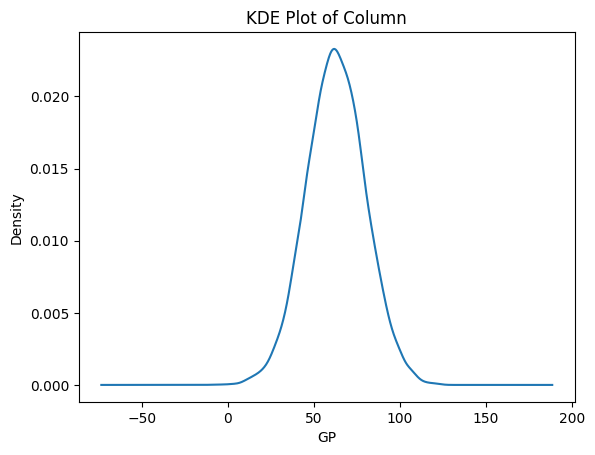

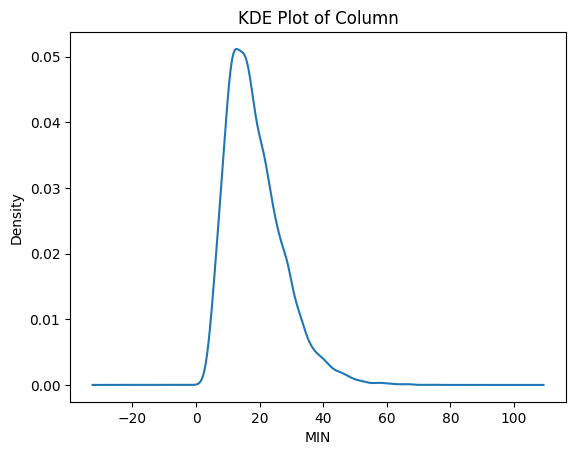

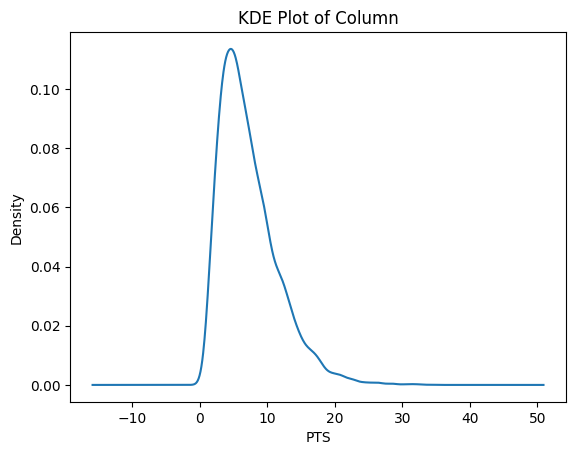

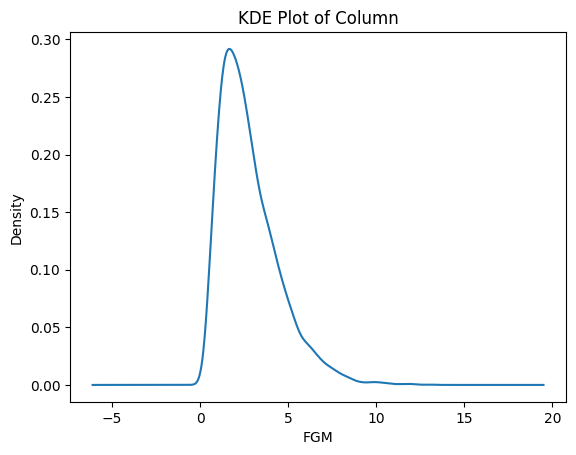

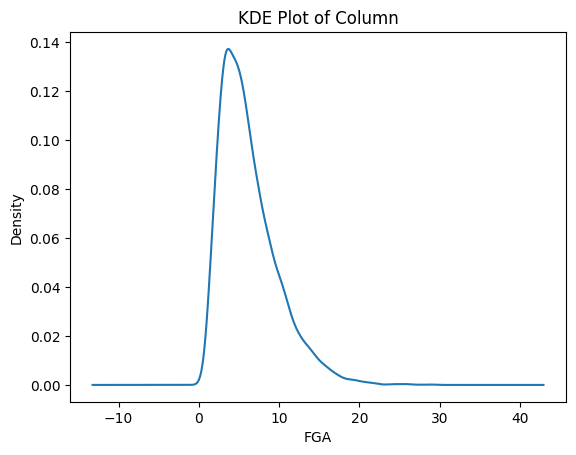

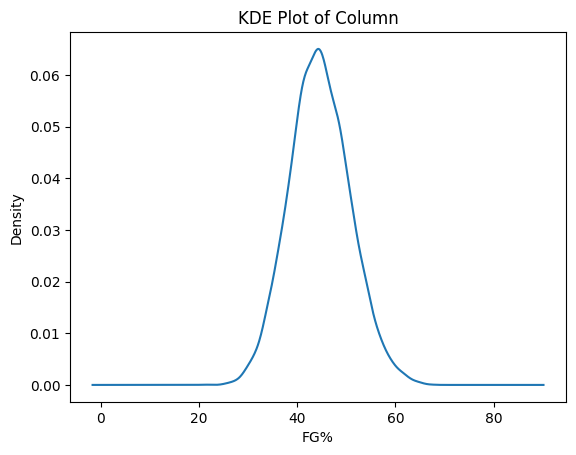

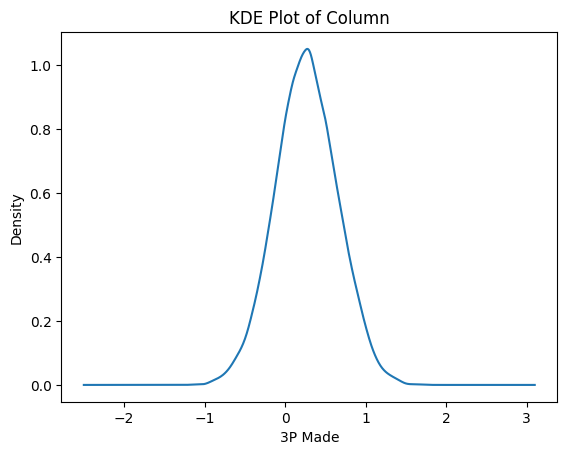

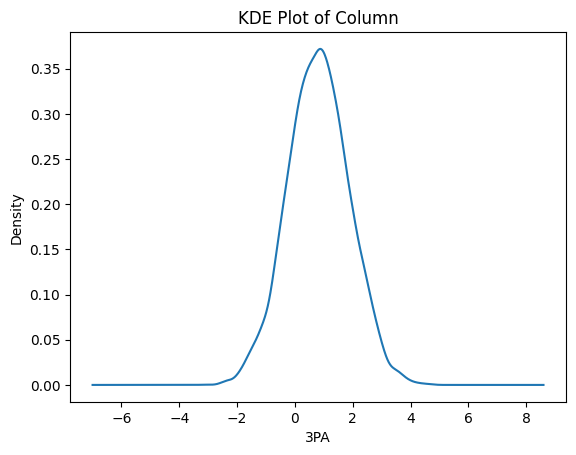

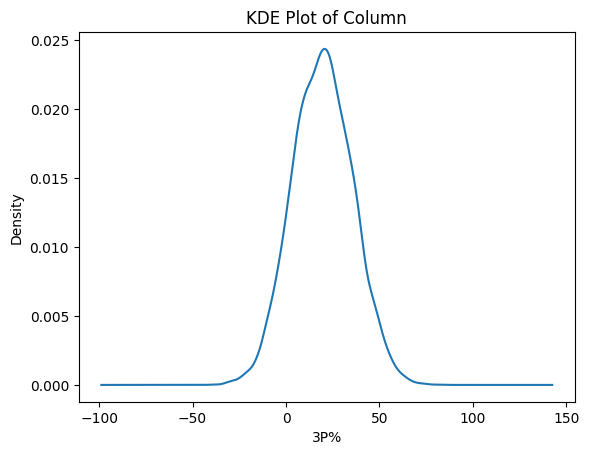

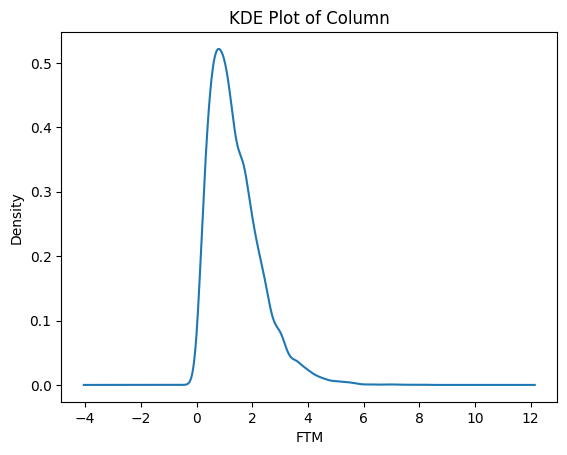

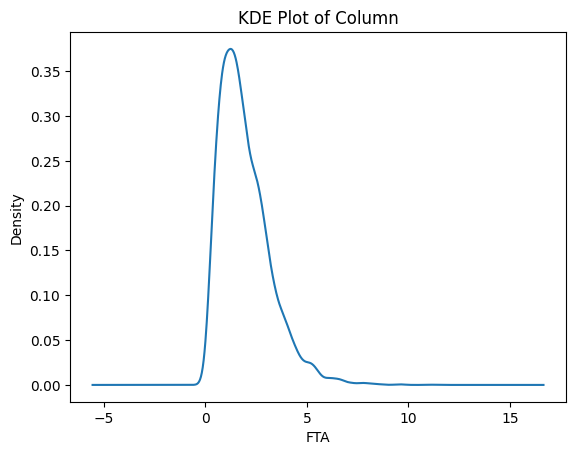

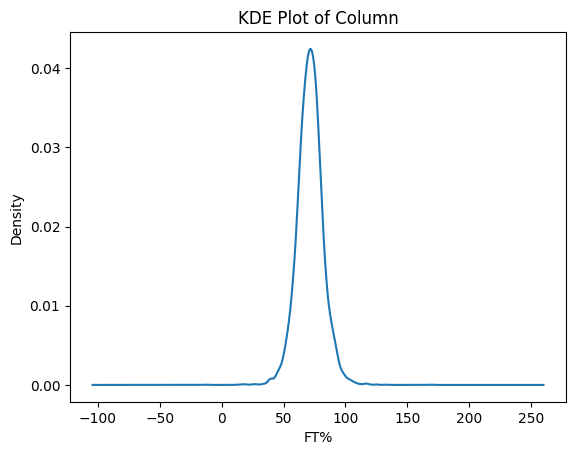

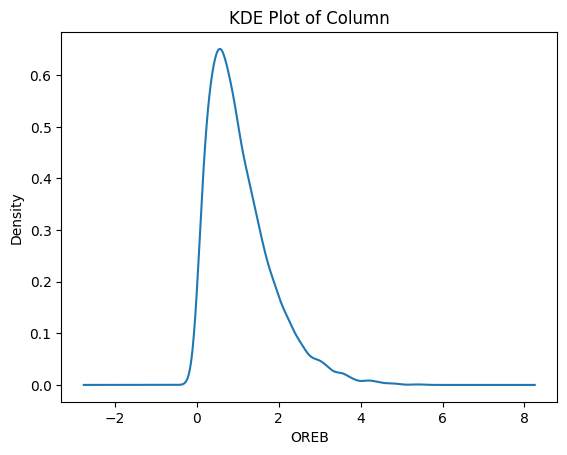

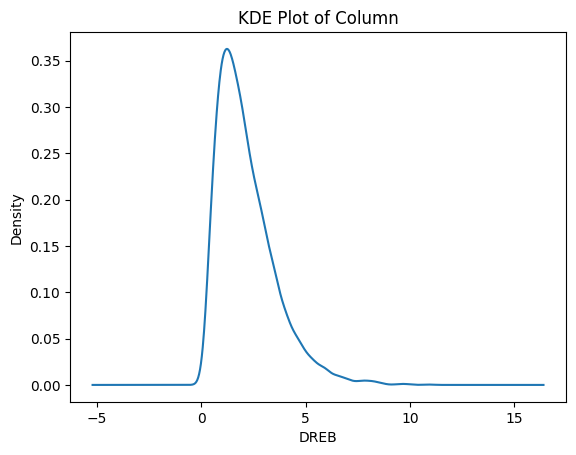

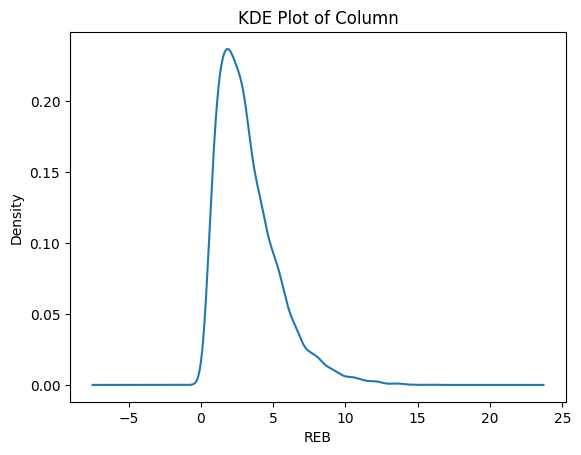

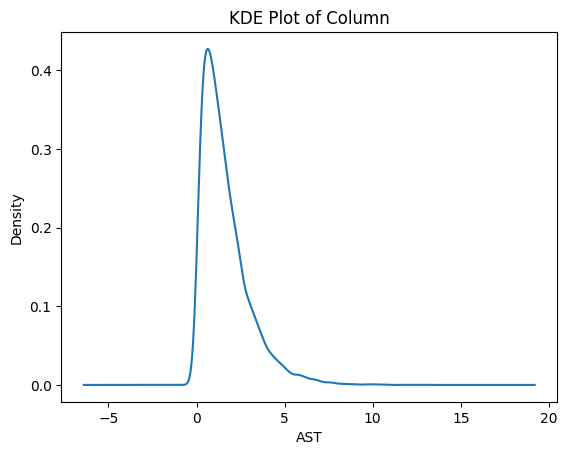

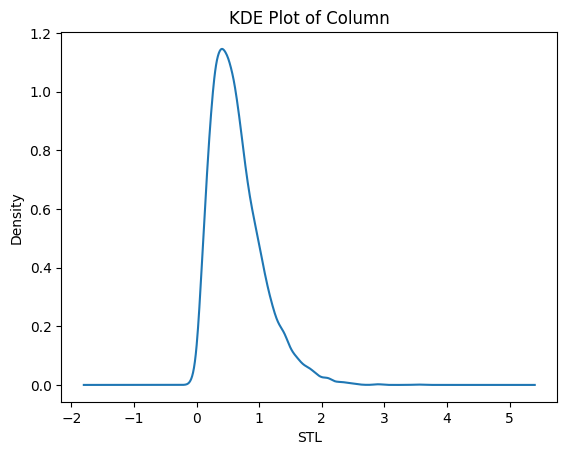

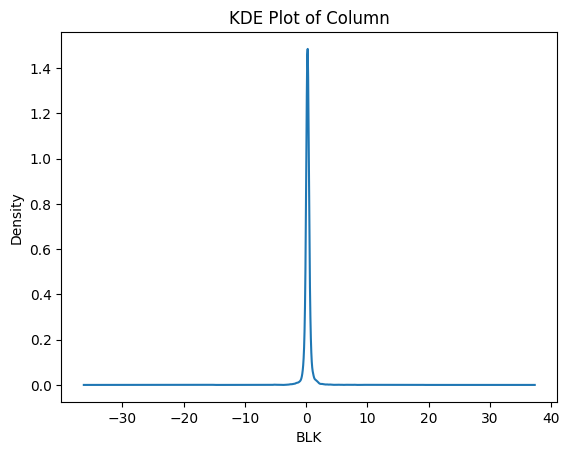

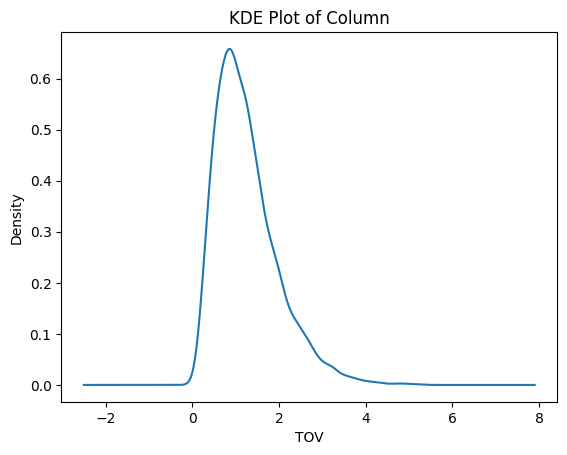

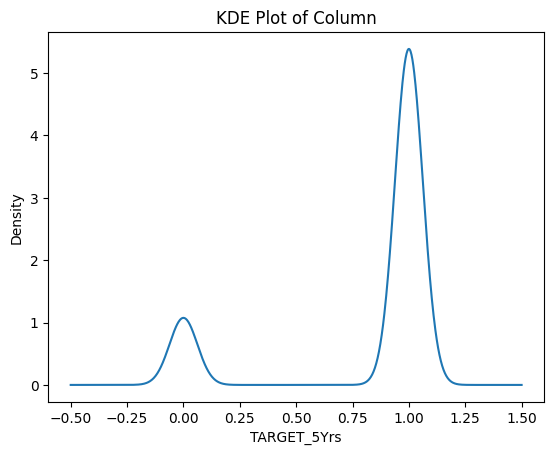

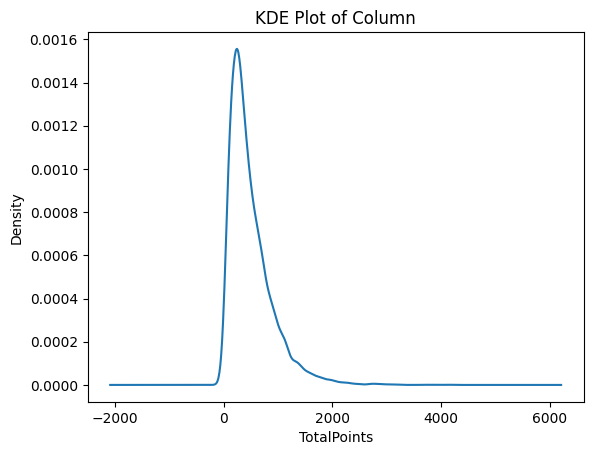

In [115]:
for col in df.columns:
    column_data = df[col]

    column_data.plot(kind='kde')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.title('KDE Plot of Column')
    plt.show()

/Users/arthurso/Library/Python/3.10/lib/python/site-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


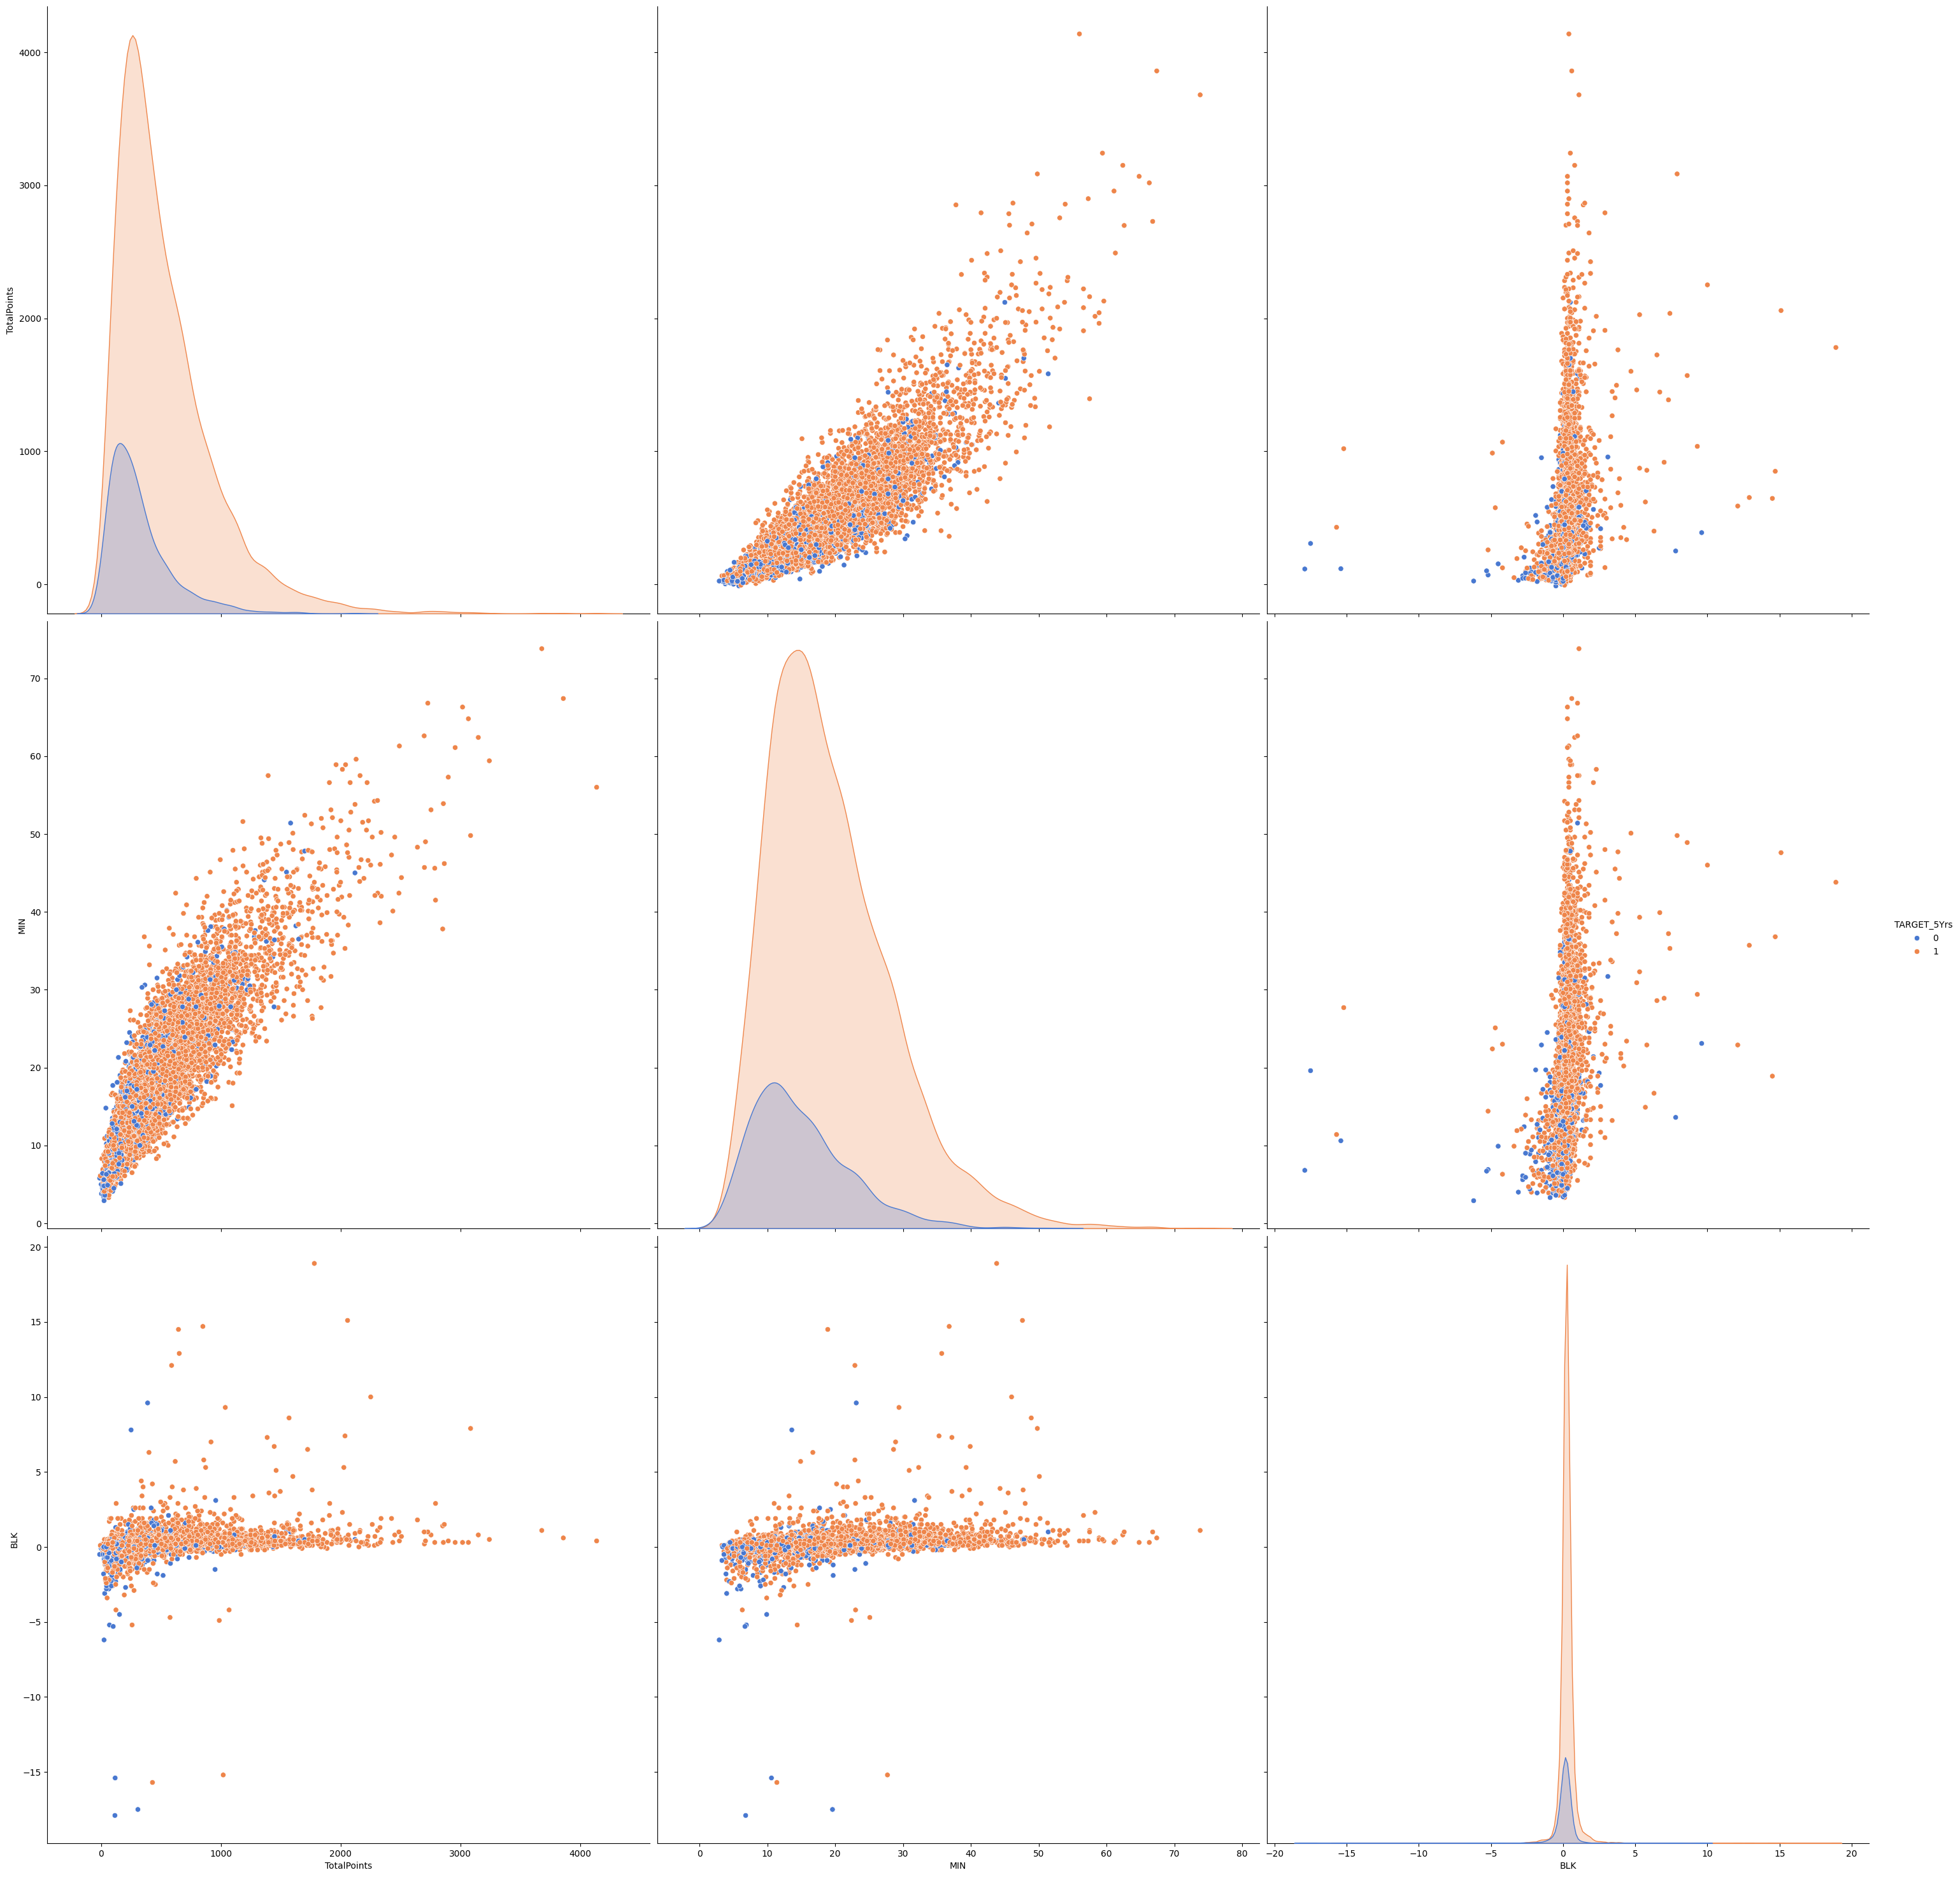

In [36]:
dl = df[['TotalPoints', 'MIN','BLK', 'TARGET_5Yrs']]
sns.pairplot(dl, kind='scatter', diag_kind='kde',hue='TARGET_5Yrs', palette='muted',size = 10)
plt.show()

In [151]:
import altair as alt
sample_df = df.sample(n=5000, random_state=42)

chart =alt.Chart(sample_df).mark_point().encode(
    x='BLK',
    y='GP',
    color=alt.Color('TARGET_5Yrs', scale=alt.Scale(range=['red', 'blue'])),
    tooltip=['GP', 'MIN', 'TARGET_5Yrs']
).interactive()
chart.show()

alt.Chart(...)